<a href="https://colab.research.google.com/github/eliasnetoDS/avaliacao-ds-creathus--EliasNeto-/blob/main/Prova_T%C3%A9cnica_Creators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importando as bibliotecas necessárias**

In [291]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer

**Leitura dos dados**

In [292]:
dados_originais = pd.read_csv("/content/drive/MyDrive/Prova Técnica Creators/housing.csv")
dados = dados_originais

In [293]:
dados.head(5)

,lon,lat,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


**Primeiras explorações**

In [294]:
dados.dtypes #verificando os tipos de dados

lon                   float64
lat                   float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [295]:
dados.shape #Dimensão da tabela

(20640, 10)

In [296]:
dados.columns  #Colunas existentes

Index(['lon', 'lat', 'housing_median_age', 'total_rooms', 'total_bedrooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity'],
      dtype='object')

In [297]:
dados.isnull().sum()   #Verificando valores nulos

lon                     0
lat                     0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [298]:
dados = dados.dropna()  #Removendo valores nulos da base

**transformar os valores categóricos (strings) em numéricos**

In [299]:
dados.ocean_proximity.value_counts() #verificando melhor a variável categórica

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [300]:
label_enconder = preprocessing.LabelEncoder()
dados['ocean_proximity'] = label_enconder.fit_transform(dados['ocean_proximity'])
dados.head(4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,lon,lat,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3


**Avaliação gráfica do comportamento dos dados para auxiliar na melhor estratégia de modelagem**

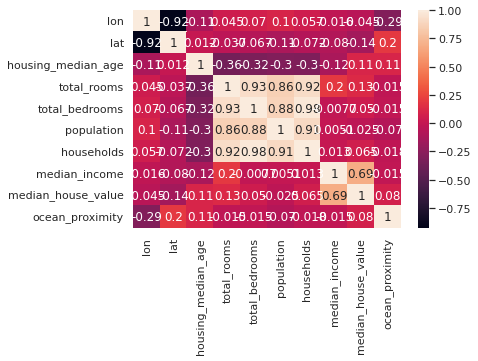

In [301]:
correlacao = dados.corr() #Verificando a correlação entre as variáveis
sns.heatmap(correlacao, annot=True)

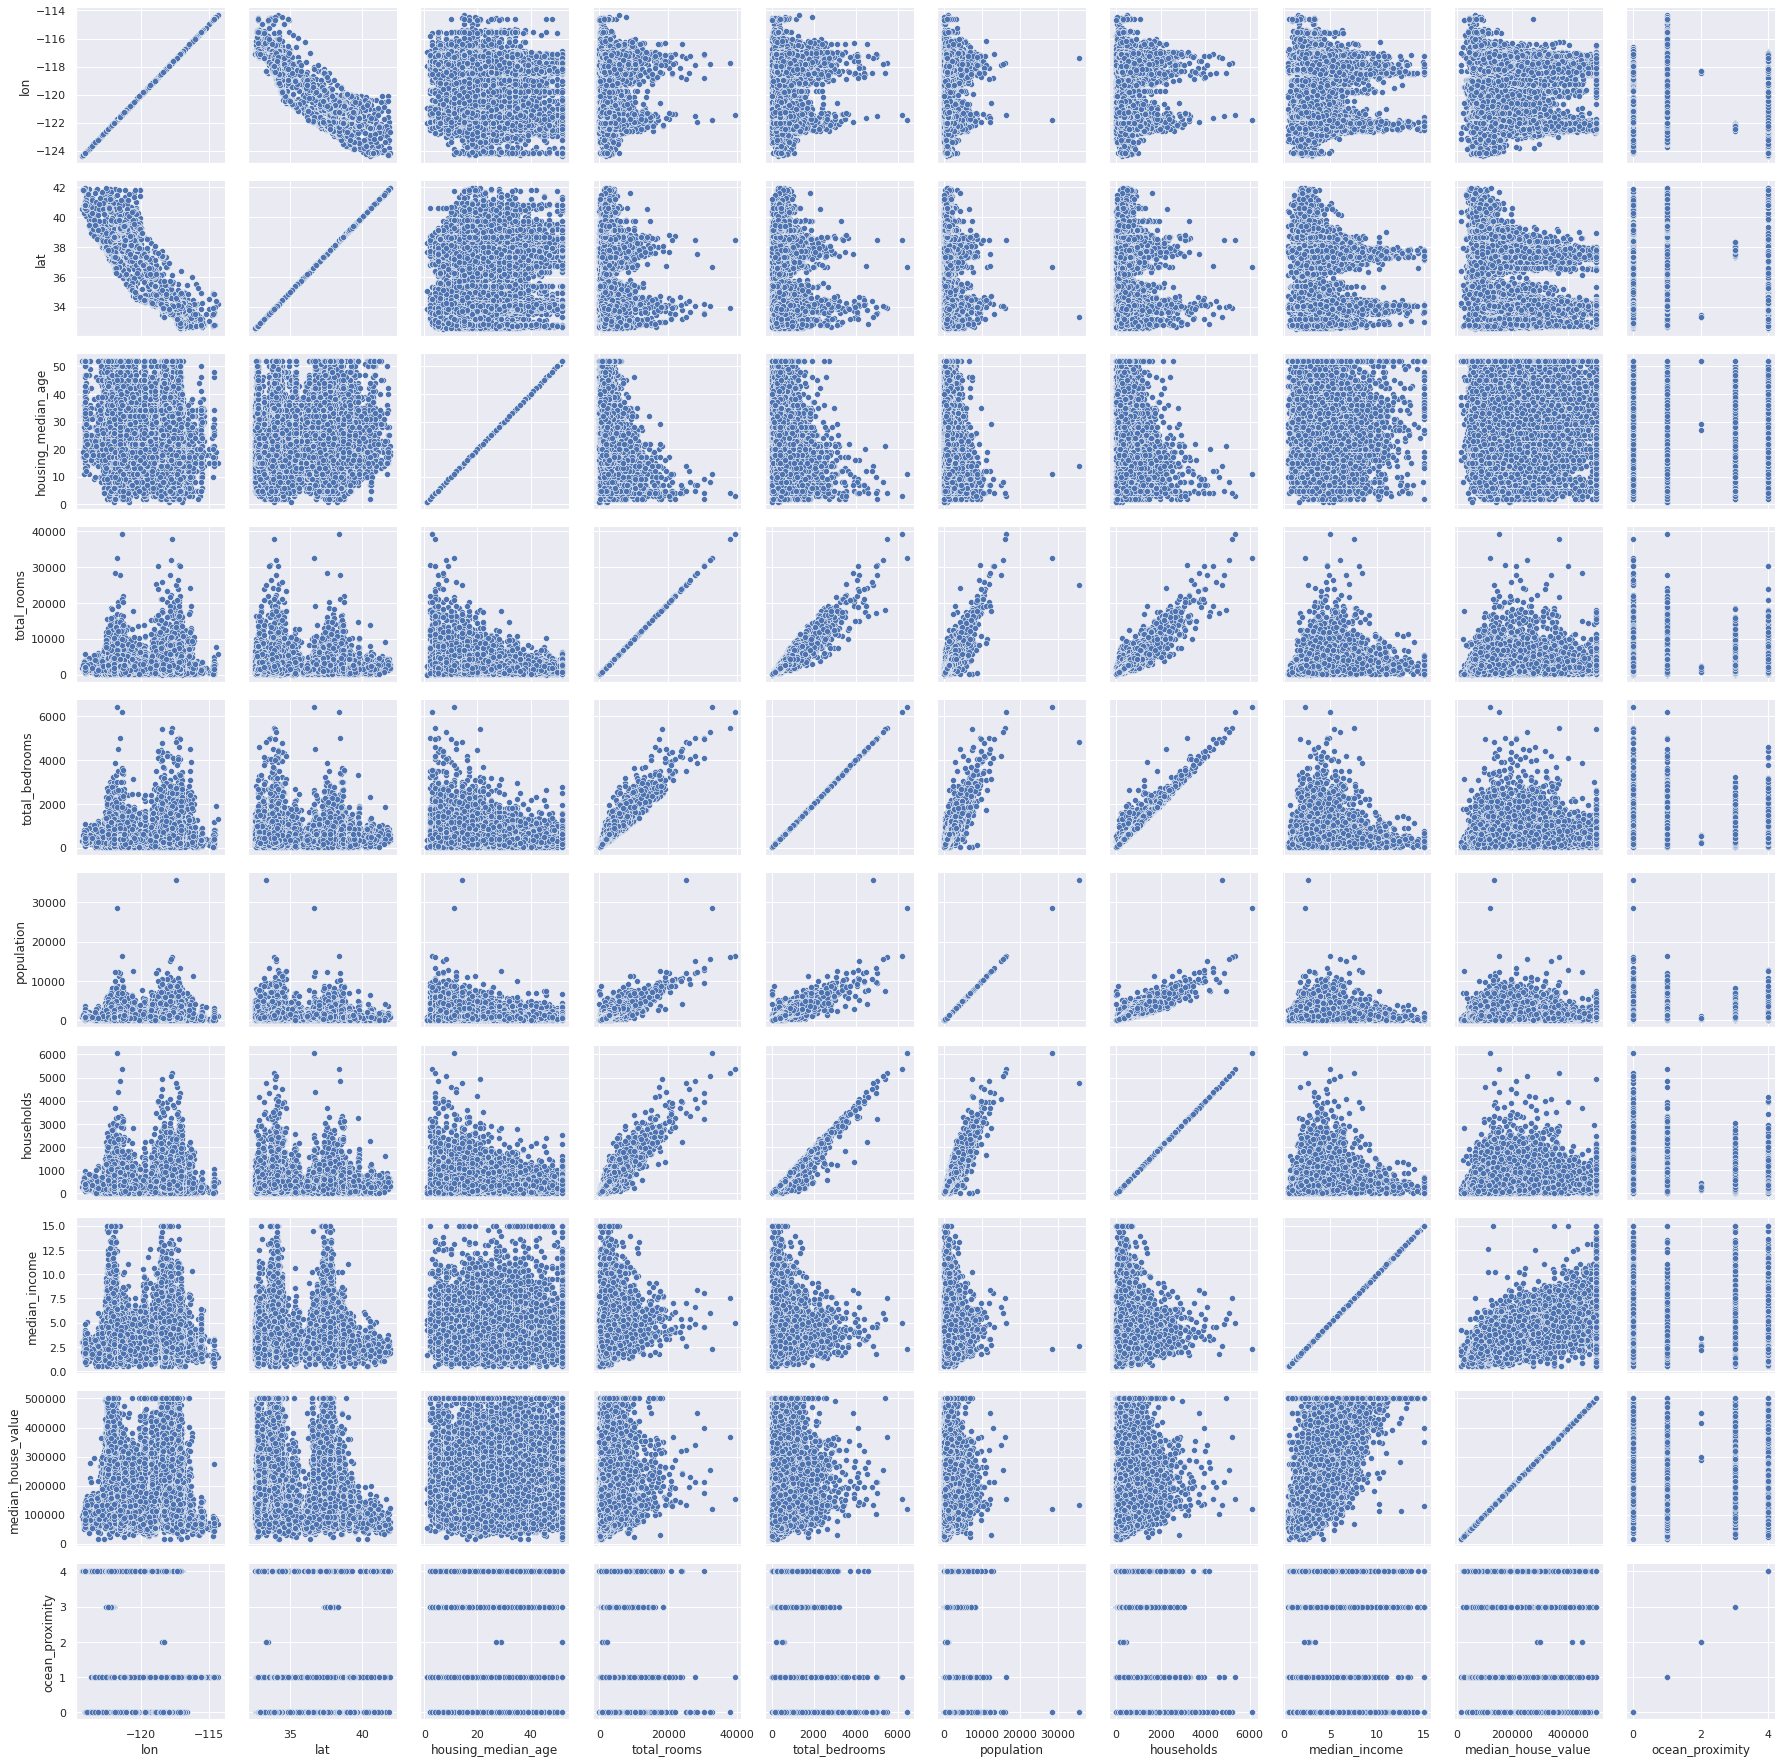

In [302]:
g = sns.PairGrid(dados)
g.map(sns.scatterplot)

**Comentário Importante sobre a relação entre as variáveis**

A matriz de correlação e a análise gráfica nos mostra que existe uma **relação NAO linear** entre o valor mediano das casas e as demais variáveis. Logo
trabalhar com regressão linear para estimar os valores das residencias pode não ser uma boa estratégia.


**Separando as variáveis independentes (x) da variável dependente (x =  preço médio das residências)**

In [303]:
x = dados.drop(['median_house_value'], axis=1) #Variáveis independentes - preditoras
y = dados.median_house_value                    #Variável dependente - resposta

**Escolha do Algoritmo**

Arvore de Regressão - é um bom recurso quando o relacionamento de dados não é linear e muito usado quando a variável dependente é contínua, como é o nosso caso com a variável: Valor mediano da casa

# ESTRATÉGIA 01 - TREINAMENTO DO MODELO

In [304]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3) 

In [305]:
precos_estimados_model = DecisionTreeRegressor()

In [306]:
precos_estimados_model.fit(x_treino, y_treino)

DecisionTreeRegressor()

In [307]:
precos_estimados_model.score(x_treino, y_treino)  #verificando score na base de treinamentos (1 ou próximo de 1 é o esperado)

1.0

# **AVALIAÇAO DA QUALIDADE DO MODELO - ESTRATÉGIA 01**

In [308]:
score1 = precos_estimados_model.score(x_teste, y_teste)   #Avaliação do Score
score1

0.60352835013808

In [309]:
valor_predito = precos_estimados_model.predict(x_teste)

In [310]:
from sklearn.metrics import mean_squared_error  #avaliando o modelo - erro quadratico médio
from sklearn.metrics import mean_absolute_error  #avaliando o modelo -  erro médio absoluto


In [311]:
print("erro quadrático médio para primeira estratégia - todas as variáveis")
eqm1 = mean_squared_error(y_teste, valor_predito)
eqm1


erro quadrático médio para primeira estratégia - todas as variáveis


5232186220.564111

In [312]:
print("erro médio absoluto para primeira estratégia - todas as variáveis")
ema1 = mean_absolute_error(y_teste, valor_predito)
ema1

erro médio absoluto para primeira estratégia - todas as variáveis


45527.595106035886

In [313]:
from numpy.ma.core import sqrt
print("Raiz quadrada do erro médio absoluto para primeira estratégia - todas as variáveis")
raiz1 = sqrt(mean_absolute_error(y_teste, valor_predito))
raiz1

Raiz quadrada do erro médio absoluto para primeira estratégia - todas as variáveis


213.37196419875758

# ESTRATÉGIA 02 - TREINAMENTO DO MODELO

**Testar deixar apenas algumas variáveis que considero mais importantes**


*   Total de quartos e quartos de dormir tem uma alta correlação, o que seria redundante. Assim optei apenas pelo número total de quartos.
*   População e número de famílias também tem alta correlação, optei pela população, por se tratar de uma variável ao meu ver de mais fácil acesso, o que é bom para variáveis independentes.

*   Latitude e longitude de certa forma tem muita relação com variável proximidade do terreno, sendo essa última uma variável categórica que foi transformada para ser usada nesse algoritmo, por esse motivo a mesma também foi excluída.







In [314]:
dados_novo = dados[['lon', 'lat', 'housing_median_age', 'total_rooms',
       'population', 'median_income', 'median_house_value']]        #Selecionando apenas algumas colunas

**Separando as variáveis independentes (x) da variável dependente (x =  preço médio das residências)**

In [315]:
x = dados_novo.drop(['median_house_value'], axis=1) #Variáveis independentes - preditoras
y = dados_novo.median_house_value                    #Variável dependente - resposta

Separando os dados de teste e treino

In [316]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3)

In [317]:
precos_estimados_model_novo = DecisionTreeRegressor()

In [318]:
precos_estimados_model_novo.fit(x_treino, y_treino)

DecisionTreeRegressor()

# AVALIAÇÃO DA QUALIDADE DO MODELO - ESTRATÉGIA 02

In [319]:
score2 = precos_estimados_model_novo.score(x_teste, y_teste)   #calculando o score
score2

0.6319735004944207

In [320]:
valor_predito = precos_estimados_model_novo.predict(x_teste)

In [321]:
print("erro quadrático médio")
eqm2 = mean_squared_error(y_teste, valor_predito)
eqm2

erro quadrático médio


4838757995.736216

In [322]:
print("erro médio absoluto")
ema2 = mean_absolute_error(y_teste, valor_predito)
ema2

erro médio absoluto


44665.05106035889

In [323]:
print("Raiz quadrada do erro médio absoluto")
raiz2 = sqrt(mean_absolute_error(y_teste, valor_predito))
raiz2

Raiz quadrada do erro médio absoluto


211.34107755086063

# ESTRATÉGIA 03 - SEM LATITUDE E LONGITUDE

Latitude e longitude tem de certa forma uma relação com a variável categórica "Proximidade do Oceano", então quero testar o treinamento do modelo sem essas duas variáveis pra ver como ficará o resultado do modelo.


In [324]:
dados_sem_coord = dados[['ocean_proximity','housing_median_age', 'total_rooms',
       'population', 'median_income', 'median_house_value']]

In [325]:
x = dados_sem_coord.drop(['median_house_value'], axis=1) #Variáveis independentes - preditoras
y = dados_sem_coord.median_house_value                    #Variável dependente - resposta

In [326]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3)

In [327]:
precos_estimados_model_sem_coord = DecisionTreeRegressor()

In [328]:
precos_estimados_model_sem_coord.fit(x_treino, y_treino)

DecisionTreeRegressor()

# AVALIAÇÃO DA QUALIDADE DO MODELO - ESTRATÉGIA 03

In [329]:
score3 = precos_estimados_model_sem_coord.score(x_teste, y_teste)    #calculando o score
score3

0.37177440589667166

In [330]:
valor_predito = precos_estimados_model_sem_coord.predict(x_teste)

In [331]:
print("erro quadrático médio")
eqm3 = mean_squared_error(y_teste, valor_predito)
eqm3

erro quadrático médio


8510267895.809951

In [332]:
print("erro médio absoluto")
ema3 = mean_absolute_error(y_teste, valor_predito)
ema3

erro médio absoluto


63704.73327895595

In [333]:
print("Raiz quadrada do erro médio absoluto")
raiz3 = sqrt(mean_absolute_error(y_teste, valor_predito))
raiz3

Raiz quadrada do erro médio absoluto


252.39796607531517

**A estratégia de remover as coordenadas e manter somente a informação de proximidade do oceano não deu certo. Os resultados da avaliação do modelo não foi satisfatório. Dessa forma, vou manter a segunda estratégia: diminuir a quantidade de variáveis, mas mantendo as coordenadas.**

# Avaliação Gráfica dos Modelos

In [334]:
score = [score1, score2, score3]
score

[0.60352835013808, 0.6319735004944207, 0.37177440589667166]

Text(0.5, 1.0, 'Valor dos Scores das Estratégias')

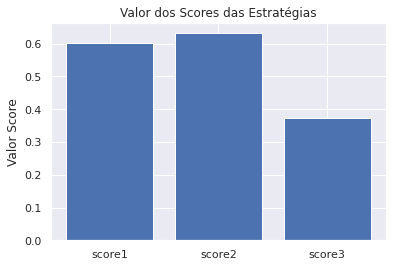

In [335]:
nomes = ["score1", "score2", "score3"]
tam = np.arange(len(score))
plt.bar(tam, score)
plt.xticks(tam, nomes)
plt.ylabel('Valor Score')
plt.title('Valor dos Scores das Estratégias')

In [336]:
ema = [ema1, ema2, ema3]
ema

[45527.595106035886, 44665.05106035889, 63704.73327895595]

Text(0.5, 1.0, 'Erros Médios Absolutos')

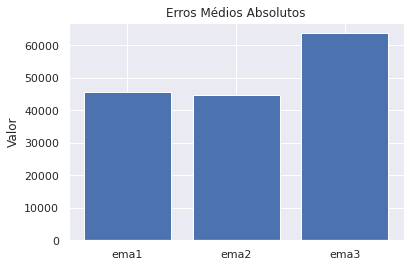

In [337]:
nomes = ["ema1", "ema2", "ema3"]
tam = np.arange(len(ema))
plt.bar(tam, ema)
plt.xticks(tam, nomes)
plt.ylabel('Valor')
plt.title('Erros Médios Absolutos')

In [338]:
eqm = [eqm1, eqm2, eqm3]
eqm

[5232186220.564111, 4838757995.736216, 8510267895.809951]

Text(0.5, 1.0, 'Erros Quadráticos Médios')

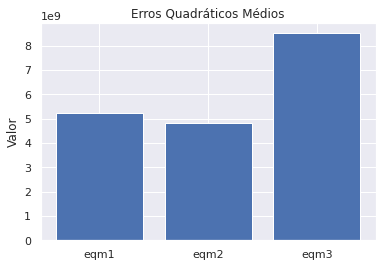

In [339]:
nomes = ["eqm1", "eqm2", "eqm3"]
tam = np.arange(len(eqm))
plt.bar(tam, eqm)
plt.xticks(tam, nomes)
plt.ylabel('Valor')
plt.title('Erros Quadráticos Médios')

In [340]:
raiz = [raiz1, raiz2, raiz3]
raiz

[213.37196419875758, 211.34107755086063, 252.39796607531517]

Text(0.5, 1.0, 'Valor da Raiz dos Erros Quadráticos')

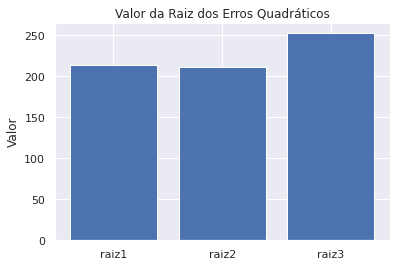

In [341]:
nomes = ["raiz1", "raiz2", "raiz3"]
tam = np.arange(len(score))
plt.bar(tam, raiz)
plt.xticks(tam, nomes)
plt.ylabel('Valor')
plt.title('Valor da Raiz dos Erros Quadráticos')

**CONCLUSÃO**

Por fim, a análise da gráfica dos modelos nos mostra que a melhor estratégia é a Estratégia 02 - Exclusão de algumas variáveis, mas mantendo Latitude e Longitude. 
Nessa estratégia, temos o Maior Score, e menores Erros Médios Absolutos, Erros Quadráticos Médios e Raiz dos Erros.

PARAMETROS DOS MODELOS

In [342]:
 from sklearn.tree import export_text

In [ ]:
export_text(precos_estimados_model_novo, feature_names = ['lon', 'lat', 'housing_median_age', 'total_rooms',
       'population', 'median_income'])

# RESPONDENDO ALGUMAS PERGUNTAS COM ANÁLISE GRÁFICA DOS DADOS

# PERGUNTA 01 - Onde tem maior concentração de imóveis no Estado da Califórnia?

Pelo mapa de calor é possível verificar que a maior concentração de imóveis está em Los Angeles. Não atoa, uma vez que a cidade é o centro da indústria de cinema e televisão do país, proximo do famoso letreiro de hollywood.

Instalando o Pymove, uma biblioteca excelente para trabalhar com dados geospaciais

In [ ]:
!pip install pymove

In [345]:
import pymove
from pymove.visualization.folium import heatmap

Fazendo um Mapa de Calor para visualizar onde mais tem imóveis na Califórnia.

In [346]:
heatmap(dados)

/usr/local/lib/python3.7/dist-packages/pymove/visualization/folium.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  move_data[COUNT] = 1
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# PERGUNTA 02 - Qual a distribuição de frequencia dos imóveis em relação a proximidade com o oceano?

A maior parte dos imóveis está a **Uma hora do Oceano**. A segunda classe mais populosa são dos imóveis classificados como estando no interior.

In [347]:
proximidade_oceano = pd.DataFrame(dados_originais.ocean_proximity.value_counts())

Text(0, 0.5, 'Número de Imóveis')

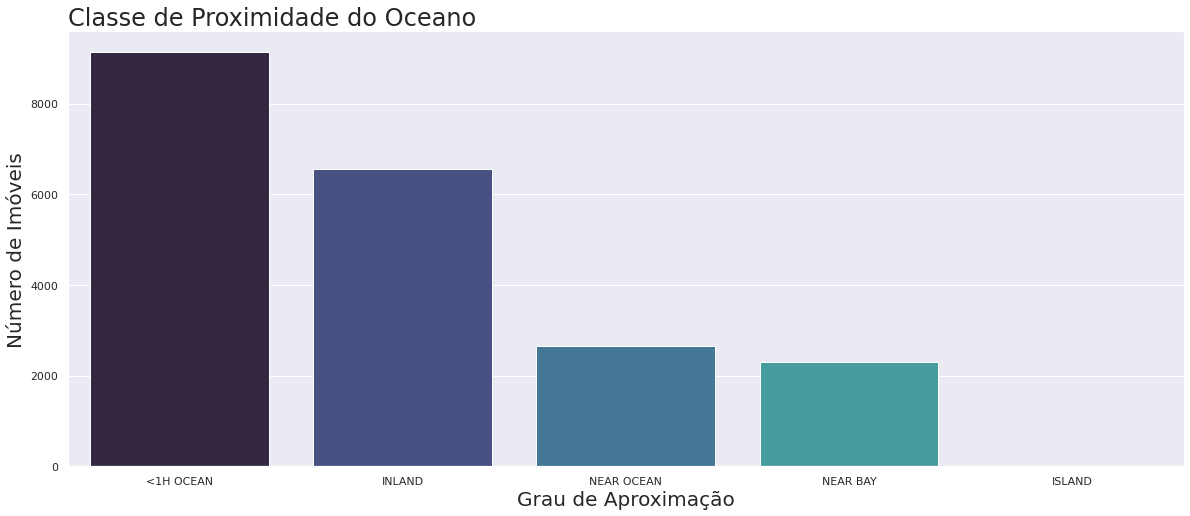

In [348]:
plt.figure(figsize=(20,8))
fig = sns.barplot(x=proximidade_oceano.index, y='ocean_proximity',data = proximidade_oceano,palette='mako')
fig.set_title('Classe de Proximidade do Oceano', loc='left',fontsize=24)
fig.set_xlabel('Grau de Aproximação do Oceano',fontsize=20)
fig.set_ylabel('Número de Imóveis',fontsize=20)

**PERGUNTA 02 - Qual a idade média dos imóveis nos bairros? Tem mais imóveis novos ou antigos?**

# PERGUNTA 03 - Qual a distribuição de frequencia para a média das idades dos imóveis por bairro?

A média de idade dos imóveis é 28,6 anos (média das médias). No entanto o desvio padrão é de 12,5 anos (ou seja as idades estão variando em relação a média 12,5 anos para mais ou menos), o que significa um coeficiente de variação de mais de 43%, uma variação alta. 

O gráfico de linha nos mostra um grande pico próximo da idade de 50 anos, é provável que para os imóveis antigos, para os quais não se sabia exatamente a idade, foi estabelecido uma idade padrão (52 anos). 



In [349]:
idade_imoveis = pd.DataFrame(dados_originais.housing_median_age.value_counts())

In [350]:
idades = idade_imoveis.index  

In [351]:
idade_imoveis['idades'] = idades  #criando uma nova coluna chamada idade

Text(0, 0.5, 'Número de Imóveis')

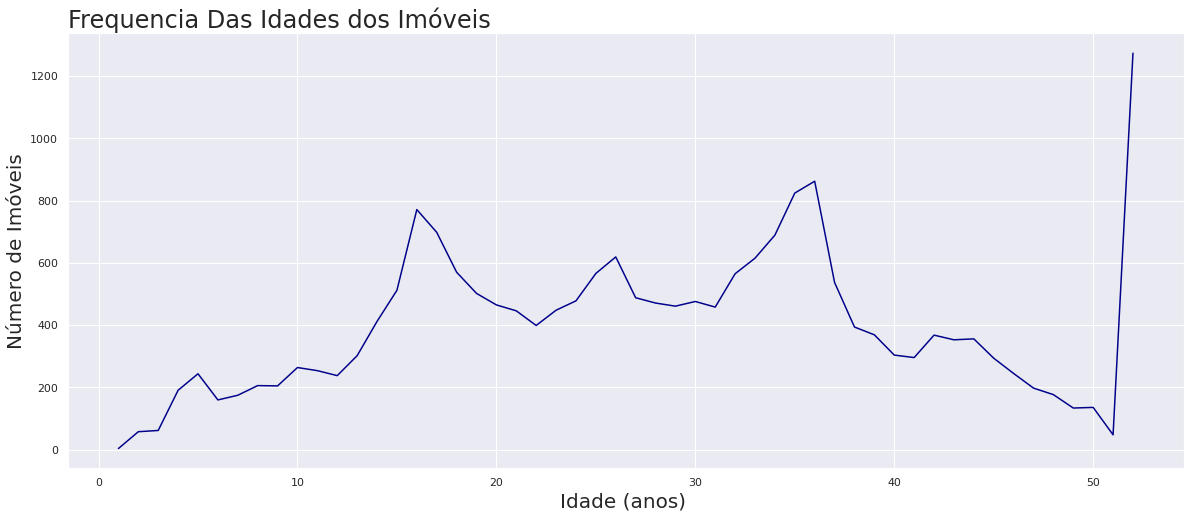

In [353]:
plt.figure(figsize=(20,8))
fig = sns.lineplot(x = "idades", y = "housing_median_age", data = idade_imoveis, color = 'darkblue')
fig.set_title('Frequencia Das Idades dos Imóveis', loc='left',fontsize=24)
fig.set_xlabel('Idade (anos) ',fontsize=20)
fig.set_ylabel('Número de Imóveis',fontsize=20)